Metrics

In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def L2Norm(obs): #L2 Norm
    obs = np.array(obs)
    #calculate the L2 norm
    L2norm = np.sqrt(np.sum(obs**2))
    return round(L2norm, 3)

def Gfit(obs, pred, t = 0.1): #a normalized least-squares using threshold t
    obs = np.array(obs)
    pred = np.array(pred)
    #set values below threshold to 0
    obs[obs < t] = 0
    pred[pred < t] = 0
    #calculate the G value
    Gvalue = 1 - (2*np.sum(obs*pred)/(np.sum(obs**2)+np.sum(pred**2)))
    return round(Gvalue,3)

def AQC(obs, pred,t = 0.1): #Accuracy score based on threshold t
    obs = np.array(obs)
    pred = np.array(pred)
    # #plot histogram of the data
    # plt.hist(obs, bins = 100, alpha = 0.5, label = 'obs')
    # plt.hist(pred, bins = 100, alpha = 0.5, label = 'pred')
    # plt.legend(loc = 'upper right')
    # plt.show()

    #set values below threshold to 0
    obs[obs == t] = -99
    pred[pred == t] = -99
    #set values above threshold to 1
    obs[obs != -99] = 99
    pred[pred != -99] = 99

    #calculate the accuracy value
    aqc = np.sum(obs == pred)/len(obs)
    # print(t)
    # print(np.sum(obs == pred))
    # print(len(obs))
    # np.savetxt('obs.txt', obs)
    # np.savetxt('pred.txt', pred)
    #return value at 3 decimal place format
    return round(aqc, 3)

def Rsquared(obs, pred): #R-squared value
    obs = np.array(obs)
    pred = np.array(pred)
    #calculate the R-squared value
    Rsquared = 1 - (np.sum((obs - pred)**2)/np.sum((obs - np.mean(obs))**2))
    return round(Rsquared, 3)

def MSE(obs, pred): #Mean Squared Error
    obs = np.array(obs)
    pred = np.array(pred)
    #calculate the mean squared error
    mse = np.mean((obs - pred)**2)
    return round(mse, 3)


def peak_dev(obs, pred):
    obs = np.array(obs)
    pred = np.array(pred)
    peak_dev = (np.max(np.abs(obs))-np.max(np.abs(pred)))/np.max(np.abs(obs))
    return peak_dev

def peak_delay(obs, pred):
    obs = np.array(obs)
    pred = np.array(pred)
    peak_delay = float(np.argmax(np.abs(obs))-np.argmax(np.abs(pred)))*240/1024
    return peak_delay

def local_peak_delays(obs, pred):
    obs = np.array(obs)
    pred = np.array(pred)

    # Find local peaks in the absolute values of the signals
    obs_peaks, _ = find_peaks(np.abs(obs))
    pred_peaks, _ = find_peaks(np.abs(pred))

    # Calculate the first peak delay
    first_peak_delay = (obs_peaks[0] - pred_peaks[0]) * 240 / 1024 if len(obs_peaks) > 0 and len(pred_peaks) > 0 else np.nan

    # Calculate the maximum peak delay
    max_peak_delay = np.nan
    if len(obs_peaks) > 0 and len(pred_peaks) > 0:
        obs_max_peak = np.argmax(np.abs(obs[obs_peaks]))
        pred_max_peak = np.argmax(np.abs(pred[pred_peaks]))
        max_peak_delay = (obs_peaks[obs_max_peak] - pred_peaks[pred_max_peak]) * 240 / 1024

    return first_peak_delay, max_peak_delay

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-7_l6wcz3 because the default path (/home/naveen.raguramalinga/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Synthetic Events

events plotting are [12, 93, 319, 609, 734]
event 12 is in run_no list
test idx is 74th event of 98 test events
data idx is 6th of 490 total events 
event 93 is in run_no list
test idx is 78th event of 98 test events
data idx is 43th of 490 total events 
event 319 is in run_no list
test idx is 43th event of 98 test events
data idx is 250th of 490 total events 
event 609 is in run_no list
test idx is 44th event of 98 test events
data idx is 328th of 490 total events 
event 734 is in run_no list
test idx is 64th event of 98 test events
data idx is 453th of 490 total events 


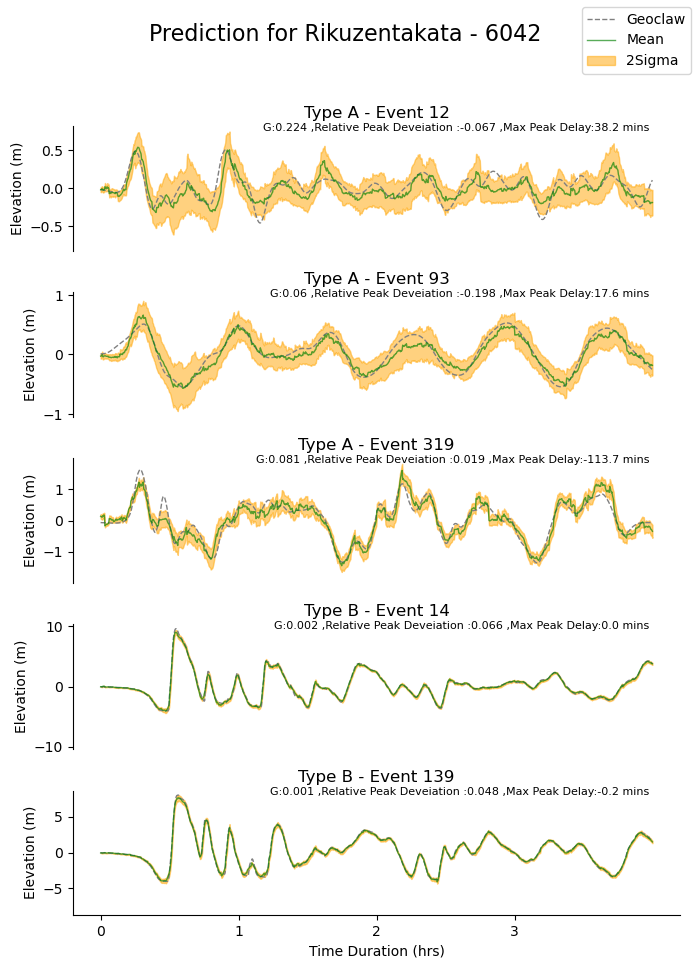

events plotting are [697, 136, 357, 323, 682]
event 697 is in run_no list
test idx is 44th event of 85 test events
data idx is 351th of 425 total events 
event 136 is in run_no list
test idx is 57th event of 85 test events
data idx is 14th of 425 total events 
event 357 is in run_no list
test idx is 31th event of 85 test events
data idx is 223th of 425 total events 
event 323 is in run_no list
test idx is 11th event of 85 test events
data idx is 189th of 425 total events 
event 682 is in run_no list
test idx is 28th event of 85 test events
data idx is 336th of 425 total events 


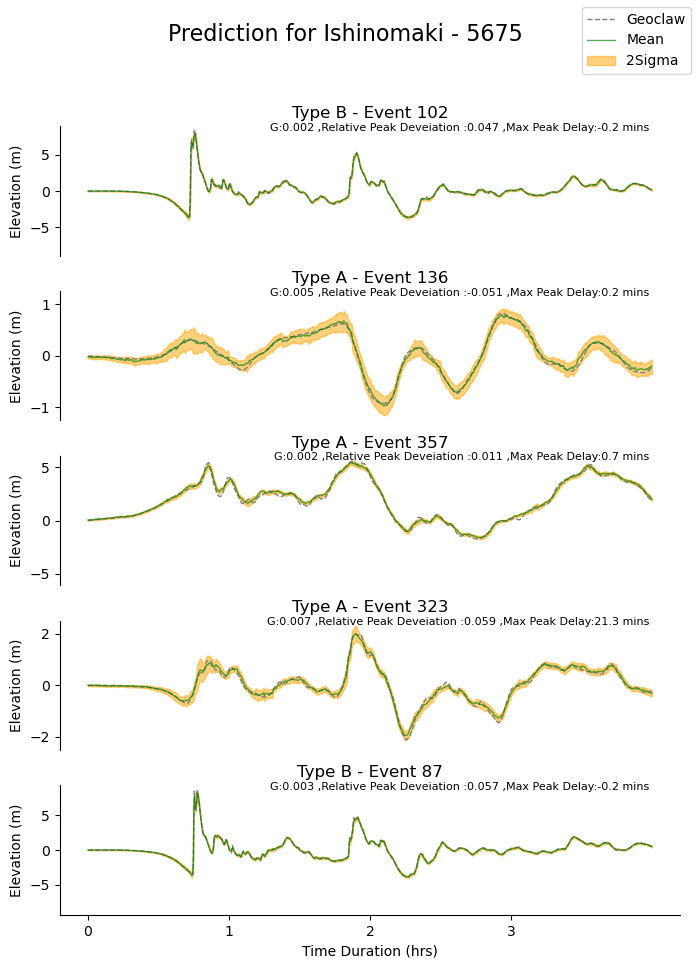

events plotting are [347, 632, 332, 206, 691]
event 347 is in run_no list
test idx is 35th event of 93 test events
data idx is 253th of 465 total events 
event 632 is in run_no list
test idx is 23th event of 93 test events
data idx is 326th of 465 total events 
event 332 is in run_no list
test idx is 72th event of 93 test events
data idx is 238th of 465 total events 
event 206 is in run_no list
test idx is 92th event of 93 test events
data idx is 112th of 465 total events 
event 691 is in run_no list
test idx is 3th event of 93 test events
data idx is 385th of 465 total events 


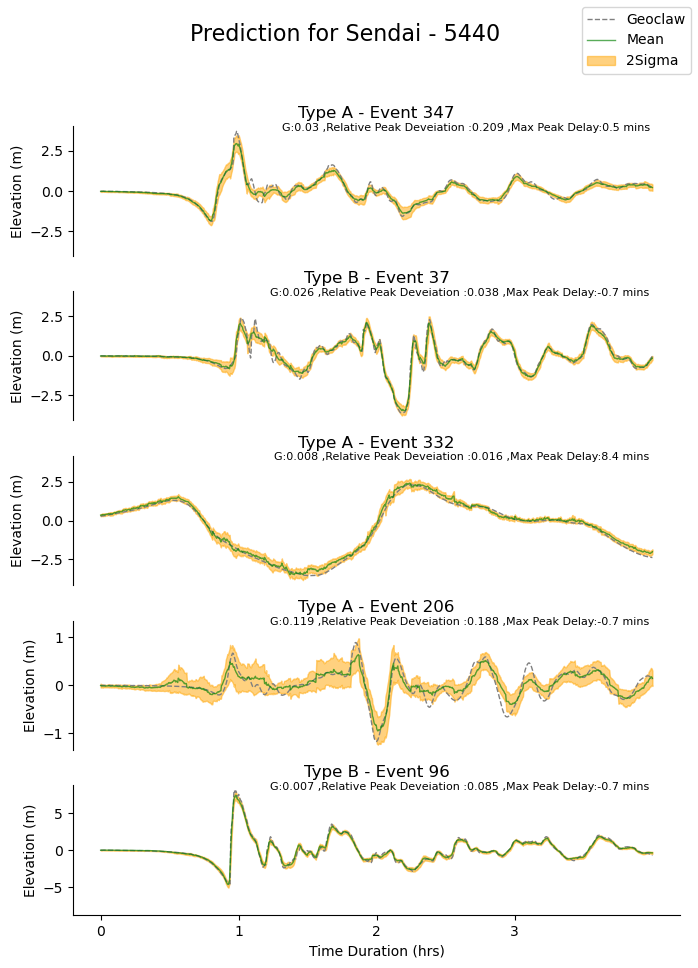

In [10]:
def read_data(g, fold,epoch):
    idx_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_data/riku_test_index_k{}.txt'.format(g, fold)
    run_idx = pd.read_csv(idx_path, header=None)[0]

    runno_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_data/riku_test_runno_k{}.txt'.format(g, fold)
    run_no = pd.read_csv(runno_path, header=None)[0]

    predict_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_output/vae_riku_test_k{}_{}.npy'.format(g, fold,epoch)
    predict = np.load(predict_path)[:, -len(run_idx):, :, :]

    data_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_data/riku.npy'.format(g)
    data = np.load(data_path)

    return run_no, run_idx, predict, data

def plot_time_series(neve, run_no, run_idx, predict, data, gauge):
    
    # get 5 random events from run_no
    # event_sel = np.random.choice(run_no.values, neve, replace=False)

    #if select events to be plotted manually
    if gauge == '_riku_6042':
        event_sel= [ 12,  93, 319, 609 ,734]
        region = 'Rikuzentakata - 6042'
    elif gauge == '_ishi_5675':
        event_sel= [697, 136, 357 ,323 ,682]
        region = 'Ishinomaki - 5675'
    elif gauge == '_shio_5440':
        event_sel= [347, 632, 332, 206, 691]
        region = 'Sendai - 5440'

    print('events plotting are {}'.format(event_sel))

    fig, ax = plt.subplots(neve, 1, figsize=(7, 10), sharex=True)
    
    fig.suptitle('Prediction for ' + region, fontsize=16)

    # plot the time series for all neve events obs and mean prediction
    for i in range(neve):
        event = event_sel[i]
        if event in run_no.values:
            print('event {} is in run_no list'.format(event))
            idx0 = np.where(run_no == event)[0][0]
            print('test idx is {}th event of {} test events'.format(idx0,len(run_no)))
            idx = run_idx[idx0]
            print('data idx is {}th of {} total events '.format(idx,len(data)))

            #get data for the event
            eve_data = data[idx][-1, :]  # 0 is input and 1 is output
            mean = np.mean(predict[:, run_no == event], axis=0).squeeze()
            std2 = 2 * np.std(predict[:, run_no == event], axis=0).squeeze()

            # plot obs as dotted grey line
            ax[i].plot(eve_data, label='Geoclaw', linestyle='--', color='grey', linewidth=1)

            # plot obs as orange line, solid
            ax[i].plot(mean, label='Mean', color='green', linewidth=1,alpha=0.65)

            # plot uncertainty as shaded area around mean light orange
            ax[i].fill_between(np.arange(len(mean)), mean - std2, mean + std2, alpha=0.5, color='orange', label='2Sigma')

            #add metrics to the plot
            text2plot = 'G:' + str(round(Gfit(eve_data, mean), 3)) +\
            ' ,Relative Peak Deveiation :' + str(round(peak_dev(eve_data, mean), 3)) +\
                ' ,Max Peak Delay:' + str(round(local_peak_delays(eve_data, mean)[1],1))+ ' mins'
                                #' ,First Peak Delay:' + str(round(local_peak_delays(eve_data, mean)[0],1))+ ' mins' +\
            ax[i].text(0.95, 0.95, text2plot, transform=ax[i].transAxes, ha='right', va='bottom', fontsize=8)
            if event  >= 595:
                ax[i].set_title('Type B - Event {}'.format(event-595), fontsize=12)
            else:
                ax[i].set_title('Type A - Event {}'.format(event), fontsize=12)
            ax[i].set_ylabel('Elevation (m)', fontsize=10)
            #set equale limits of positive and negative y axis limits
            maxlim = np.max(np.abs(ax[i].get_ylim()))
            ax[i].set_ylim(-maxlim, maxlim)
            ax[i].spines['top'].set_visible(False)
            ax[i].spines['right'].set_visible(False)
            ax[i].spines['bottom'].set_visible(False)
            ax[i].spines['left'].set_visible(True)
            ax[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

            if i == neve - 1:
                ax[i].set_xticks(np.arange(0, 1024, 256))
                ax[i].set_xticklabels(np.arange(0, 4, 1))
                ax[i].spines['bottom'].set_visible(True)
                ax[i].set_xlabel('Time Duration (hrs)', fontsize=10)
                ax[i].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
        else:
            print('event {} is not in run_no'.format(event))
    #assign legend to the overall plot in top right corner
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #save figure
    plt.savefig('/mnt/beegfs/nragu/tsunami/japan/Paper/_plots/pre_TS{}_f{}.png'.format(g,fold), dpi=300)
    plt.show()

g_list = ['_riku_6042','_ishi_5675','_shio_5440']
epoch_list = [1500,3000,2000]
fold = 0
neve = 5

for n,g in enumerate(g_list):
    run_no, run_idx, predict, data = read_data(g, fold,epoch_list[n])
    plot_time_series(neve, run_no, run_idx, predict, data,g)




Performance stats for all test events

In [5]:
def read_data(g, fold,epoch):
    idx_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_data/riku_test_index_k{}.txt'.format(g, fold)
    run_idx = pd.read_csv(idx_path, header=None)[0]

    runno_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_data/riku_test_runno_k{}.txt'.format(g, fold)
    run_no = pd.read_csv(runno_path, header=None)[0]

    predict_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_output/vae_riku_test_k{}_{}.npy'.format(g, fold,epoch)
    predict = np.load(predict_path)[:, -len(run_idx):, :, :]

    data_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_data/riku.npy'.format(g)
    data = np.load(data_path)

    return run_no, run_idx, predict, data
def calc_stat(gauge,epoch):
#empty table
    stat = pd.DataFrame(columns=['ID','G', 'R2', 'MSE', 'L2Norm'])   
    fold = [0,1,2,3,4]
    for f in fold:#0-4
        print('fold {}'.format(f))
        run_no, run_idx, predict, data = read_data(g, f,epoch)   
        if gauge == '_riku_6042':
            Site = 'Rikuzentakata'
        elif gauge == '_ishi_5675':
            Site = 'Ishinomaki'
        elif gauge == '_shio_5440':
            Site = 'Sendai'
        print('Calculating metrics for {} fold {}'.format(Site,f))
        obs_test = data[run_idx]
        for e in range(predict.shape[1]): #0-98ish 
            eve_data = obs_test[e, -1, :] # 0 is input and -1 is output
            for p in range(predict.shape[0]): #0-99 
                pred = predict[p, e,:,:].squeeze()
                stat = pd.concat([stat, pd.DataFrame({'ID': run_no[e],
                                                    'Fold': f,
                                                    'Site': Site,
                                                    'Type':'TS',
                                                    'G': Gfit(eve_data, pred),
                                                    'R2': Rsquared(eve_data, pred),
                                                    'MSE': MSE(eve_data, pred),
                                                    'L2Norm': L2Norm(eve_data)}, index=[0])], ignore_index=True)               
    #plot last 
    # plt.plot(eve_data, label='obs', linestyle='--', color='grey', linewidth=1)
    # plt.plot(pred, label='pred', color='green', linewidth=1,alpha=0.65)
    # plt.show()
    #save to csv
    stat.to_csv('/mnt/beegfs/nragu/tsunami/japan/Paper/_results/Perf_test_ts_{}.csv'.format(Site),index=False)

g_list = ['_riku_6042','_ishi_5675','_shio_5440']
epoch_list = [1500,3000,2000]
for n,g in enumerate(g_list):
    calc_stat(g,epoch_list[n])

fold 0
Calculating metrics for Rikuzentakata fold 0
fold 1
Calculating metrics for Rikuzentakata fold 1
fold 2
Calculating metrics for Rikuzentakata fold 2
fold 3
Calculating metrics for Rikuzentakata fold 3
fold 4
Calculating metrics for Rikuzentakata fold 4
fold 0
Calculating metrics for Ishinomaki fold 0
fold 1
Calculating metrics for Ishinomaki fold 1
fold 2
Calculating metrics for Ishinomaki fold 2
fold 3
Calculating metrics for Ishinomaki fold 3
fold 4
Calculating metrics for Ishinomaki fold 4
fold 0
Calculating metrics for Sendai fold 0
fold 1
Calculating metrics for Sendai fold 1
fold 2
Calculating metrics for Sendai fold 2
fold 3
Calculating metrics for Sendai fold 3
fold 4
Calculating metrics for Sendai fold 4


Historic Events

events plotting are ['FUJI2011_42', 'SANRIKU1896', 'SANRIKU1933', 'TOKACHI1968', 'YAMAZAKI2018_TPMOD']
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Rikuzentakata; event FUJI2011_42; G is 0.106; Rsquared is 0.18; MSE is 10.196;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Rikuzentakata; event SANRIKU1896; G is 0.17; Rsquared is 0.508; MSE is 0.246;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Rikuzentakata; event SANRIKU1933; G is 0.2; Rsquared is 0.419; MSE is 0.717;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Rikuzentakata; event TOKACHI1968; G is 0.046; Rsquared is 0.895; MSE is 0.201;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shap

/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

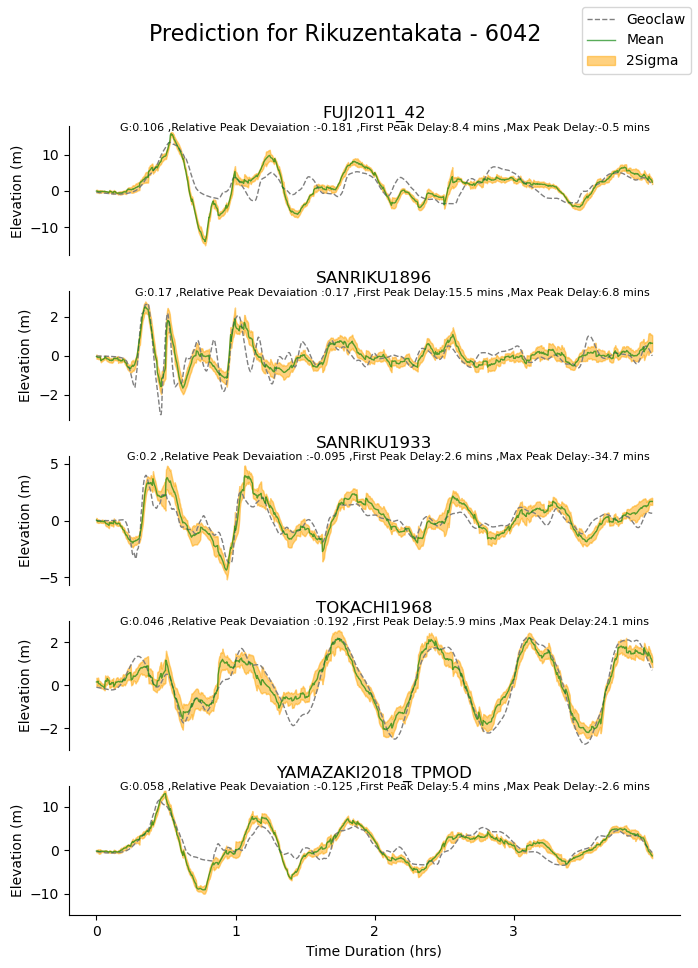

events plotting are ['FUJI2011_42', 'SANRIKU1896', 'SANRIKU1933', 'TOKACHI1968', 'YAMAZAKI2018_TPMOD']
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Ishinomaki; event FUJI2011_42; G is 0.099; Rsquared is 0.562; MSE is 1.727;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Ishinomaki; event SANRIKU1896; G is 0.433; Rsquared is 0.378; MSE is 0.012;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Ishinomaki; event SANRIKU1933; G is 0.145; Rsquared is 0.777; MSE is 0.037;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Ishinomaki; event TOKACHI1968; G is 0.173; Rsquared is 0.672; MSE is 0.012;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean

/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

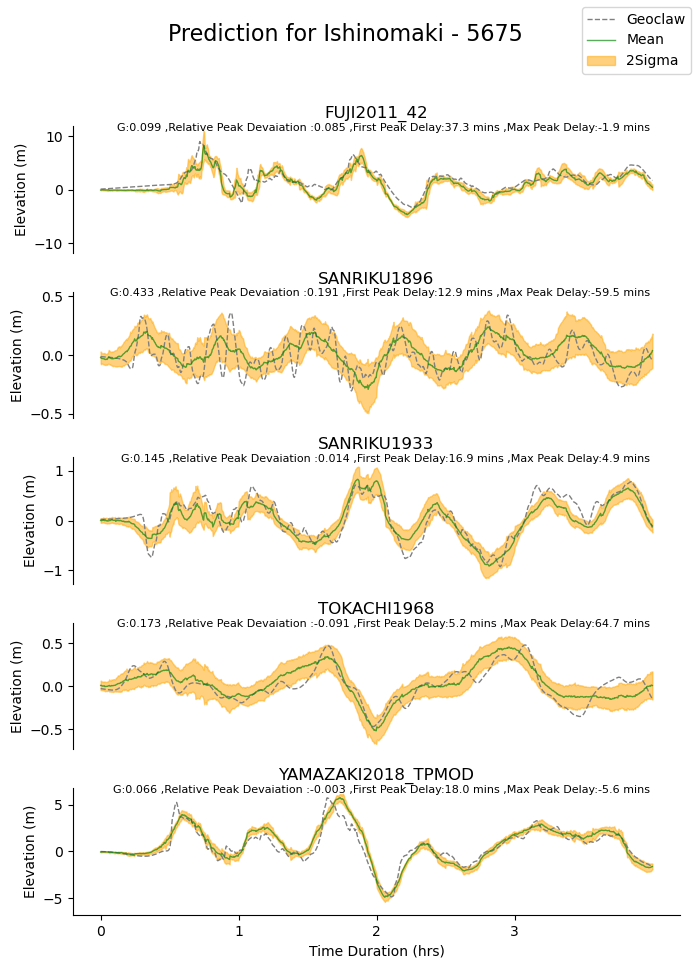

events plotting are ['FUJI2011_42', 'SANRIKU1896', 'SANRIKU1933', 'TOKACHI1968', 'YAMAZAKI2018_TPMOD']
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Sendai; event FUJI2011_42; G is 0.068; Rsquared is 0.759; MSE is 1.395;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Sendai; event SANRIKU1896; G is 0.506; Rsquared is 0.251; MSE is 0.02;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Sendai; event SANRIKU1933; G is 0.325; Rsquared is 0.431; MSE is 0.1;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape of std2 is (1024,)
For site Sendai; event TOKACHI1968; G is 0.312; Rsquared is 0.441; MSE is 0.022;L2Norm
shape of predict is (500, 1, 1024)
shape of eve_data is (1024,)
shape of mean is (1024,)
shape o

/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Site':site,
/tmp/ipykernel_3442641/1981823508.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

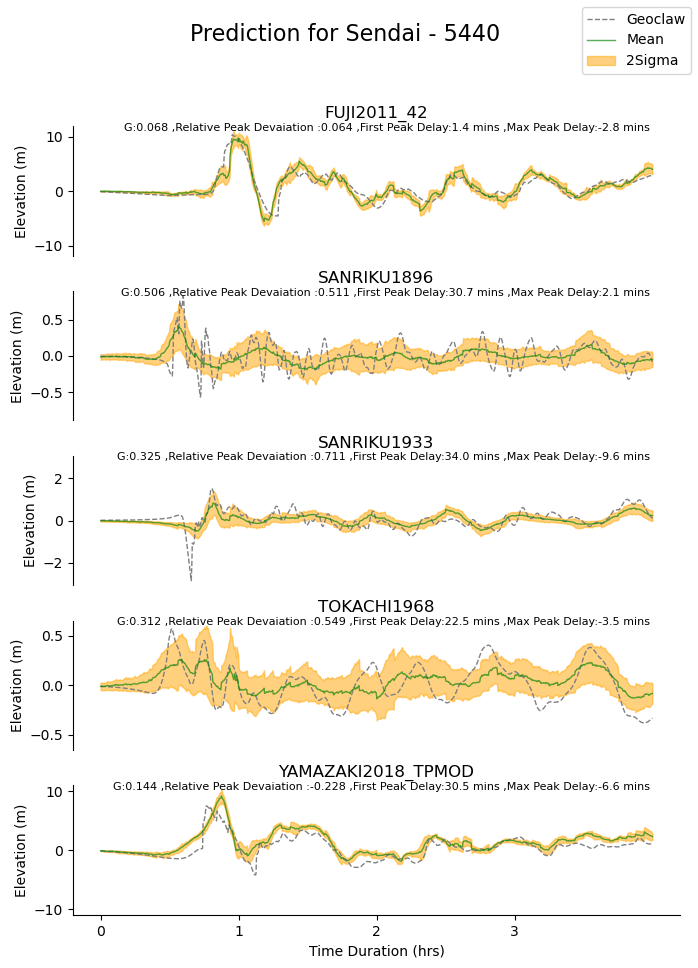

In [5]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_data(g,epoch,hist_name,fold=0,):   
    predict_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_output/vae_riku_test_{}_k{}_e{}.npy'.format(g,hist_name,fold,epoch)
    predict = np.load(predict_path)
    
    data_path = '/mnt/beegfs/nragu/tsunami/japan/Paper/TS/{}/_output/vae_riku_obs_{}.npy'.format(g,hist_name) #historical data
    data = np.load(data_path)[:, -1, :].squeeze()
    return predict, data

def plot_time_series(gauge):

    #prepare empty pd dataframe to store the results Site, Event, G, Rsquared, MSE
    results = pd.DataFrame(columns = ['Site', 'Event', 'G', 'Rsquared', 'MSE'])
    fold =[0,1,2,3,4]

    #if select events to be plotted manually
    if gauge == '_riku_6042':
        region = 'Rikuzentakata - 6042'
        site = 'Rikuzentakata'
        epoch = 1500
    elif gauge == '_ishi_5675':
        region = 'Ishinomaki - 5675'
        site = 'Ishinomaki'
        epoch = 3000
    elif gauge == '_shio_5440':
        region = 'Sendai - 5440'
        site = 'Sendai'
        epoch = 2000

    hist_name_list = ['FUJI2011_42','SANRIKU1896','SANRIKU1933','TOKACHI1968','YAMAZAKI2018_TPMOD']   

    print('events plotting are {}'.format(hist_name_list))

    fig, ax = plt.subplots(len(hist_name_list), 1, figsize=(7, 10), sharex=True)
    
    fig.suptitle('Prediction for ' + region, fontsize=16)

    # plot the time series for all neve events obs and mean prediction
    for i,hist_name in enumerate(hist_name_list):

        for f in fold:
            predict_fold, eve_data = read_data(gauge,epoch,hist_name,f)
            if f == 0:
                predict = predict_fold
            else:
                predict = np.append(predict,predict_fold, axis=0)
        
        print('shape of predict is {}'.format(predict.shape))
        print('shape of eve_data is {}'.format(eve_data.shape))

        #get data for the event
        mean = np.mean(predict, axis=0).squeeze()
        std2 = 2 * np.std(predict, axis=0).squeeze()

        print('shape of mean is {}'.format(mean.shape))
        print('shape of std2 is {}'.format(std2.shape))

        #calculate G,Rsquared and MSE for the mean prediction
        Geve = Gfit(eve_data,mean)
        Rsquaredeve = Rsquared(eve_data,mean)
        MSEeve = MSE(eve_data,mean)
        L2Normeve = L2Norm(eve_data)

        #store the results
        results = results.append({'Site':site,
                                'Event':hist_name,
                                'G':Geve,
                                'Rsquared':Rsquaredeve,
                                'MSE':MSEeve, 
                                'L2Norm':L2Normeve},
                                ignore_index=True)
        print('For site {}; event {}; G is {}; Rsquared is {}; MSE is {};L2Norm'.format(site,hist_name,Geve,Rsquaredeve,MSEeve, L2Normeve))

        # plot obs as dotted grey line
        ax[i].plot(eve_data, label='Geoclaw', linestyle='--', color='grey', linewidth=1)

        # plot obs as orange line, solid
        ax[i].plot(mean, label='Mean', color='green', linewidth=1,alpha=0.65)

        # plot uncertainty as shaded area around mean light orange
        ax[i].fill_between(np.arange(len(mean)), mean - std2, mean + std2, alpha=0.5, color='orange', label='2Sigma')

        #add metrics to the plot
        text2plot = 'G:' + str(round(Gfit(eve_data, mean), 3)) +\
        ' ,Relative Peak Devaiation :' + str(round(peak_dev(eve_data, mean), 3)) +\
            ' ,First Peak Delay:' + str(round(local_peak_delays(eve_data, mean)[0],1))+ ' mins' +\
                ' ,Max Peak Delay:' + str(round(local_peak_delays(eve_data, mean)[1],1))+ ' mins'
        ax[i].text(0.95, 0.95, text2plot, transform=ax[i].transAxes, ha='right', va='bottom', fontsize=8)         

        ax[i].set_title('{}'.format(hist_name), fontsize=12)
        ax[i].set_ylabel('Elevation (m)', fontsize=10)
        #set equale limits of positive and negative y axis limits
        maxlim = np.max(np.abs(ax[i].get_ylim()))
        ax[i].set_ylim(-maxlim, maxlim)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(True)
        ax[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

        if i == len(hist_name_list) - 1:
            ax[i].set_xticks(np.arange(0, 1024, 256))
            ax[i].set_xticklabels(np.arange(0, 4, 1))
            ax[i].spines['bottom'].set_visible(True)
            ax[i].set_xlabel('Time Duration (hrs)', fontsize=10)
            ax[i].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

    #assign legend to the overall plot in top right corner
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #save figure
    plt.savefig('/mnt/beegfs/nragu/tsunami/japan/Paper/_plots/pre_TS{}_f{}_hist.png'.format(g,fold))
    plt.show()

    results.to_csv(f'/mnt/beegfs/nragu/tsunami/japan/Paper/_results/Perf_hist_ts_{site}.csv', index=False)

g_list = ['_riku_6042','_ishi_5675','_shio_5440']

for n,g in enumerate(g_list):
    plot_time_series(g)
